In [67]:
#Importa todas as bibliotecas necessárias
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

# Função mágica para representação dos gráficos
%matplotlib inline

In [68]:
np.random.seed(42)

In [69]:
# Define a quantidade de amostras:
M = 100

In [70]:
# Função de entrada:
x1 = np.random.randn(M, 1)
x2 = np.sqrt(10)*randn(M, 1)

# Função de saída:
y = x1 + x2

In [71]:
def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000, a_init=np.array([-10.0, -10.0]).reshape(2, 1)):
    """Batch gradient descent solution."""
    
    # Randomiza o parâmetro do peso
    a = a_init
    
    # Cria um vetor para o histórico dos parâmetros
    a_hist = np.zeros((2, n_iterations+1))
    # Inicializa um vetor histórico
    a_hist[:, 0] = a.reshape(2,)

    # Cria um vetor para para armazenar os valores dos erros
    Jgd = np.zeros(n_iterations+1)

    Jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > 0.0001:
        gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        Jgd[iteration+1] = (1.0/M)*sum(np.power((y - X.dot(a)), 2))
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        iteration = iteration + 1
    return a, Jgd, a_hist, grad_hist, iteration

In [72]:
X = np.c_[x1, x2]

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [73]:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

In [74]:
N = 400

a1 = np.linspace(-40.0, 44.0, N)
a2 = np.linspace(-40.0, 44.0, N)

A1, A2 = np.meshgrid(a1, a2)

In [75]:
x1 = X[:,0].reshape(M, 1)
x2 = X[:,1].reshape(M, 1)

In [76]:
J = np.zeros((N,N))

In [77]:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - yhat))

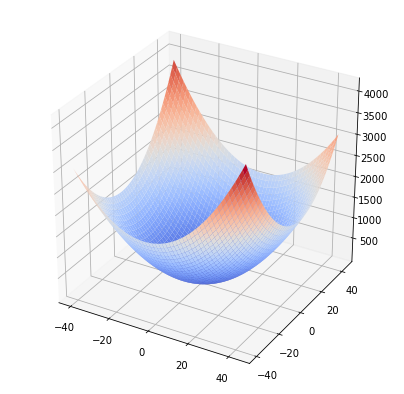

In [78]:
fig  = plt.figure(figsize=(7,7))
ax   = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm)

In [79]:
# Define o número de iterações
n_iterations = 2000
# Define o valor do passo de aprendizado
alpha = 0.4

In [80]:
a_init = np.array([-2.0, -24.0]).reshape(2, 1)

In [81]:
a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y, alpha, n_iterations, a_init)

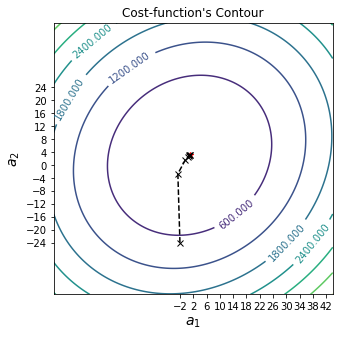

In [82]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx--')
plt.xticks(np.arange(-2, 44, step=4.0))
plt.yticks(np.arange(-24, 26, step=4.0))
plt.savefig("error_contour_fs_gradient_variation.png", dpi=600)
plt.show()

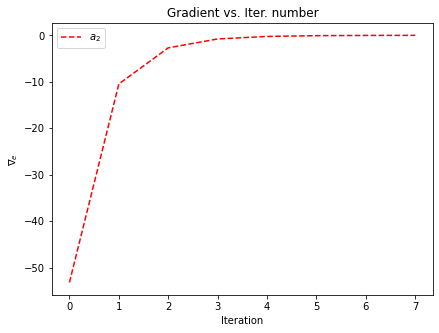

In [83]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(122)
ax.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax.set_xlabel('Iteration')
ax.set_ylabel('$\\nabla_e$')
ax.set_title('Gradient vs. Iter. number')
ax.legend()

plt.show()